# 相関行列

In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [2]:
# 「#」（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [4]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airquality.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'airquality.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'airquality.txt') # Python 3 の場合

('airquality.txt', <http.client.HTTPMessage at 0x10754bcf8>)

In [5]:
# データの読み込み
df = pd.read_csv('airquality.txt', sep='\t', index_col=0) 

In [6]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
6,28,NaN,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9
10,NaN,194,8.6,69,5,10


In [7]:
# 相関行列
pd.DataFrame(np.corrcoef(df.dropna().iloc[:, :4].T.as_matrix().tolist()), 
             columns=df.columns[:4], index=df.columns[:4])

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.612497,0.698541
Solar.R,0.348342,1.000000,-0.127183,0.294088
Wind,-0.612497,-0.127183,1.000000,-0.497190
Temp,0.698541,0.294088,-0.497190,1.000000


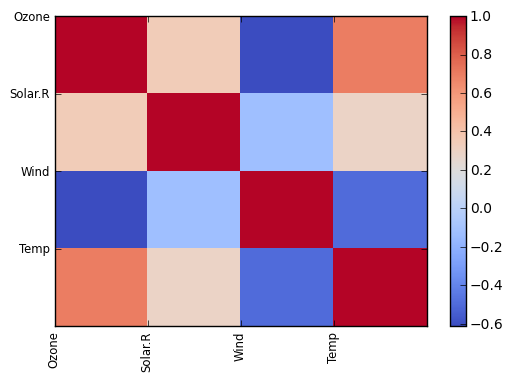

In [10]:
# 相関行列をカラーマップで見やすく。
corrcoef = np.corrcoef(df.dropna().iloc[:, :4].T.as_matrix().tolist())
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.pcolor(corrcoef, cmap=plt.cm.Blues)
plt.pcolor(corrcoef, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
xticks = ax.set_xticks(range(len(corrcoef)))
xlabels = ax.set_xticklabels(list(df.columns[:4]), rotation =90,fontsize ="small")
yticks = ax.set_yticks(range(len(corrcoef)))
ylabels = ax.set_yticklabels(list(df.columns[:4]), rotation =0,fontsize ="small")
plt.xlim([0, len(corrcoef)])
plt.ylim([len(corrcoef),0])
plt.show()